<a href="https://colab.research.google.com/github/tawfeeq6719/Handwritten-digit-prediction/blob/main/Handwritten_digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HANDWRITTEN DIGIT PREDICTION**

Objective:

The objective of this project is to build a machine learning model that can predict handwritten digits using the Random Forest Classifier algorithm.

Data Source:

The dataset used in this project is the "load_digits" dataset from the scikit-learn library.

Import Library:

In [36]:
from skimage.transform import resize

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt


In [5]:
from sklearn.datasets import load_digits

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
from sklearn.ensemble import RandomForestClassifier

Import Data:

In [9]:
df=load_digits()

Describe Data:

The dataset consists of images of handwritten digits from 0 to 9. Each image is represented as a 2D array of pixel values

Data Visualization:

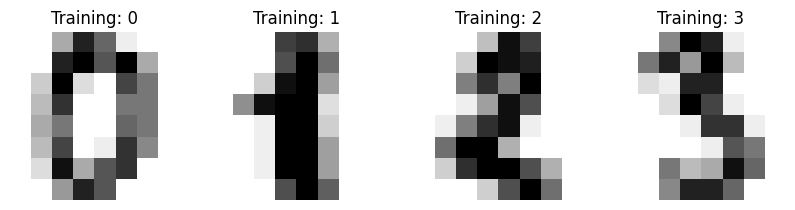

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df.images[0].shape

(8, 8)

In [14]:
len(df.images)

1797

Data Preprocessing:

In [15]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data[0].shape

(64,)

In [18]:
data.shape

(1797, 64)

In [19]:
data.min()

0.0

In [20]:
data.max()

16.0

In [21]:
data=data/16

In [22]:
data.min()

0.0

In [23]:
data.max()

1.0

In [24]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Define Target Variable (y) and Feature Variables (X):

X = data

y = df.target

Train Test Split:

In [25]:
x_train, x_test,y_train,y_test = train_test_split(data,df.target, test_size=0.3)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Modeling:

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(x_train,y_train)

RandomForestClassifier()

Model Evaluation:

In [29]:
y_pred = rf.predict(x_test)

In [30]:
y_pred

array([5, 5, 4, 1, 9, 5, 8, 8, 7, 5, 2, 6, 9, 4, 7, 5, 2, 1, 4, 4, 8, 0,
       9, 0, 5, 1, 3, 6, 1, 4, 5, 7, 8, 7, 3, 8, 5, 6, 1, 2, 0, 2, 1, 1,
       8, 4, 6, 1, 8, 3, 8, 7, 1, 4, 2, 1, 3, 8, 4, 7, 3, 3, 9, 3, 9, 7,
       9, 8, 0, 2, 2, 3, 8, 3, 1, 3, 7, 5, 6, 7, 2, 3, 2, 3, 7, 1, 0, 0,
       9, 0, 5, 4, 9, 7, 1, 0, 8, 8, 3, 9, 1, 4, 8, 6, 8, 7, 3, 0, 1, 4,
       0, 9, 5, 6, 8, 1, 1, 1, 9, 7, 1, 9, 0, 4, 9, 2, 5, 0, 1, 2, 2, 3,
       9, 0, 0, 2, 6, 3, 0, 3, 7, 4, 1, 4, 4, 5, 4, 4, 8, 3, 8, 4, 7, 6,
       7, 2, 0, 7, 5, 1, 5, 9, 8, 1, 0, 6, 7, 3, 2, 9, 5, 7, 1, 0, 8, 5,
       0, 0, 5, 7, 1, 1, 5, 3, 6, 5, 3, 3, 5, 9, 4, 9, 9, 0, 5, 9, 3, 7,
       2, 8, 5, 5, 4, 6, 8, 6, 1, 6, 7, 6, 1, 0, 4, 3, 8, 8, 9, 9, 8, 6,
       8, 6, 9, 4, 5, 3, 0, 4, 5, 3, 6, 0, 6, 9, 3, 8, 5, 3, 9, 5, 2, 0,
       7, 0, 3, 1, 3, 9, 9, 9, 5, 2, 1, 4, 6, 6, 6, 3, 8, 6, 3, 2, 0, 3,
       3, 3, 5, 2, 9, 6, 3, 8, 4, 8, 0, 8, 9, 8, 2, 6, 8, 2, 3, 4, 4, 1,
       0, 2, 1, 4, 9, 5, 3, 6, 6, 8, 7, 5, 7, 0, 7,

In [31]:
confusion_matrix(y_test,y_pred)

array([[62,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 66,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  1, 47,  1,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  1,  2,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 66]])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.93      1.00      0.96        52
           2       0.95      0.95      0.95        44
           3       0.99      0.97      0.98        68
           4       0.96      0.98      0.97        53
           5       0.98      0.92      0.95        51
           6       0.98      0.98      0.98        45
           7       0.98      1.00      0.99        49
           8       0.94      0.94      0.94        47
           9       1.00      0.97      0.99        68

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



Prediction:

In [37]:

new_digit = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


new_digit = np.array(new_digit)


new_digit_resized = resize(new_digit, (8, 8), anti_aliasing=True)


new_digit_resized = new_digit_resized.flatten() / 16


predicted_digit = rf.predict([new_digit_resized])


print("Predicted digit:", predicted_digit)

Predicted digit: [1]


Explanation:

1. The code begins by importing the necessary libraries and loading the "load_digits" dataset. The dataset is then visualized using matplotlib.

2. Next, the data is preprocessed by reshaping the images and scaling the pixel values. The target variable (y) and feature variables (X) are defined.

3. The data is split into training and testing sets using the train_test_split function.

4. A Random Forest Classifier model is created and trained using the training data.

5. The model is evaluated by predicting the digits for the test data and calculating the confusion matrix and classification report.

Finally, the model can be used for prediction on new handwritten digits by providing the new data to the trained model.






